## Подготовка

Загрузка csv-файла, приложенного к заданию

In [ ]:
!gdown --id 1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1h2eXP4EyL8hYT2kZ0wmShAtp8Qz8HpNq
To: /content/us events ad_revenue filtered 03.02-07.02.csv
100% 571M/571M [00:06<00:00, 90.0MB/s]


Подключение необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
from statsmodels.tsa.seasonal import seasonal_decompose

Чтение csv-файла

In [ ]:
df = pd.read_csv('/content/us events ad_revenue filtered 03.02-07.02.csv', converters={'event_json': eval})

Парсинг даных столбца event_json

In [ ]:
pd.json_normalize(df['event_json'])

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,banner,,1,0,637794449687371810,474.15260,0.000020,1.007506,0.080914,0.080914,0.000020,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,165277
860075,banner,,1,0,637794223717667630,10.89967,0.006740,0.277541,3.379858,3.379858,0.006740,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMeYrb2S4vUCFZWVyAodrPYHvA
860076,banner,,1,0,637794223868486920,25.97572,0.002780,0.280321,3.319878,3.319878,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CNrdyMCS4vUCFRNXcgodTqsMOA
860077,banner,,1,0,637794223980531730,37.18013,0.002780,0.283101,3.265896,3.265896,0.002780,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CJnr0ciS4vUCFQ7HhwodgC8HVw


In [ ]:
df = df.drop('event_json', axis='columns').join(pd.json_normalize(df['event_json']))

## Предобработка данных

In [ ]:
df.isna().mean()*100

profile_id                  0.001628
os_version                  0.000000
device_manufacturer         0.000000
device_model                0.000000
device_type                 0.000000
device_locale               0.000000
event_name                  0.000000
event_datetime              0.000000
event_timestamp             0.000000
event_receive_datetime      0.000000
event_receive_timestamp     0.000000
connection_type             0.000000
operator_name               2.195031
country_iso_code            0.000000
city                       37.637008
ad_type                     0.000000
placement                   0.000000
view_index                  0.000000
session_view_index          0.000000
cur_ticks                   0.000000
session_length              0.000000
revenue                     0.000000
ads_ltv                     0.000000
ecpm_sma                    0.000000
normalized_ecpm_sma         0.000000
value                       0.000000
currency                    0.000000
a

Видим, что для 38% данных нет информации о городах. Соответственно лишь 62% доходов содержат информацию о городах пользователей.<br>
Возможно, город не определился из-за того, что место показа рекламы территориально находилось в пригороде либо в небольшом населенном пункте, поэтому не будем удалять отсутсвующую информацию, а вынесем её в отдельную категорию "other":

In [ ]:
df = df.fillna('other')

Проверим данные на наличие дубликатов:

In [ ]:
df.duplicated().sum()

0

Дубликаты в данных отсутствуют.

In [ ]:
#df = df.drop_duplicates()

## Анализ данных

### Распределение средних eCPM-ов юзеров для каждого формата рекламы

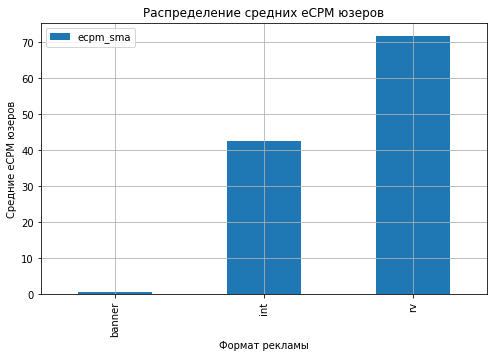

In [ ]:
df.pivot_table(index='ad_type', values='ecpm_sma', aggfunc='mean').plot(grid=True, figsize=(8, 5), kind = 'bar')
plt.title('Распределение средних eCPM юзеров')
plt.xlabel('Формат рекламы')
plt.ylabel('Средние eCPM юзеров')
plt.show()

Самые большие средние значения eCPM получаются с показа видео-рекламы. Примерно, в 2 раза меньший средний доход с юзеров у полноэкранной рекламы. И давольно небольшой доход в сравнении с предыдущими двумя типами реламы с показа баннеров.

### Распределение средних eCPM-ов по городам

Посмотрим топ-25 городов с наибольшим средним eCPM:

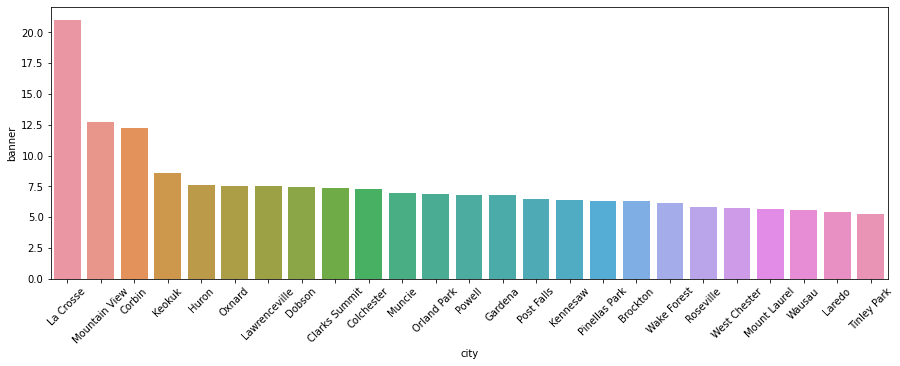

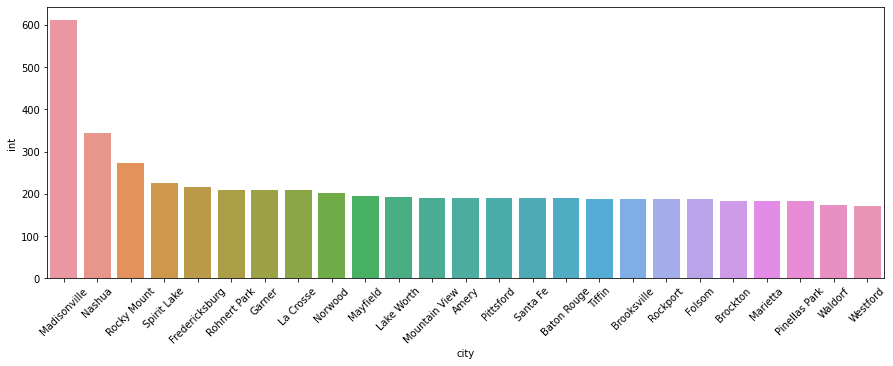

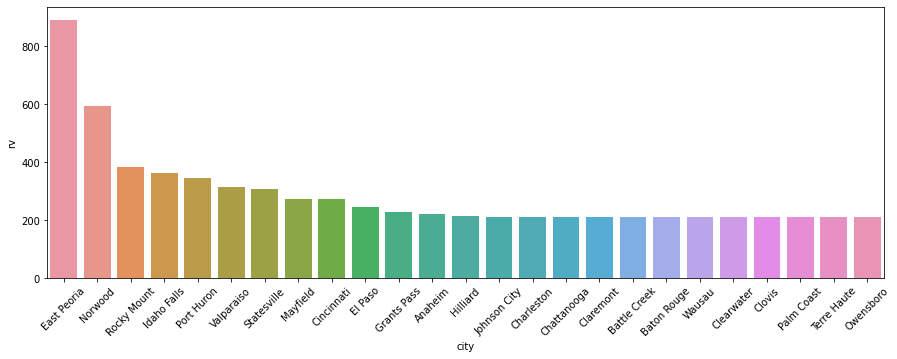

In [ ]:
for item in ['banner', 'int', 'rv']:
  plt.figure(figsize=(15,5))
  sns.barplot(x='city',y=item, data=df.pivot_table(index='city', values='ecpm_sma', columns='ad_type', aggfunc='mean').sort_values(by = item, ascending = False).reset_index().head(25))
  plt.xticks(rotation=45)
  plt.show()

Самые большие средние значения eCPM для баннеров имеют города La Crosse, Mountain View, Corbin, далее идёт плавное уменьшение данного показателя. <br>
Для полноэкранной рекламы в топе Madisonvill, Nashua и Rocky Mount. <br>
Для видео рекламы - East Peoria и Norwood. 

Посмотрим на статистически значимые данные:

In [ ]:
df_mean_ad_type_city = df.pivot_table(index='city', values='ecpm_sma', columns='ad_type', aggfunc='mean')

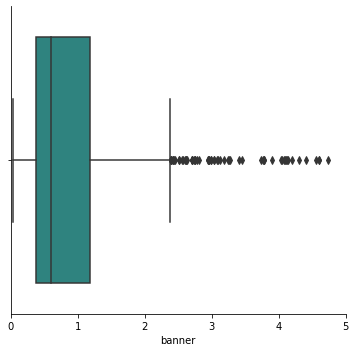

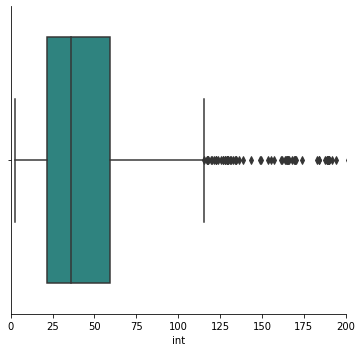

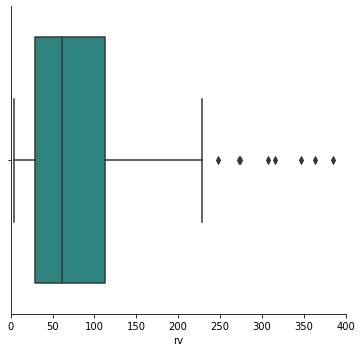

In [ ]:
for item in ['banner', 'int', 'rv']:
    sns.catplot(x=item, kind="box", data=df_mean_ad_type_city, palette='viridis')
    if item == 'banner':
      plt.xlim(0, 5)
    elif item == 'int':
      plt.xlim(0, 200)
    else:
      plt.xlim(0, 400)
    plt.show()

Из диаграмм "Ящик с усами" видим, что для баннеров средним значением в распределении по городам является eCPM, равный, порядка 0,5 USD. Средний eCPM полноэкранной рекламы составляет порядка 37 USD, для видео этот показатель является самым большим и равен, приблизительно, 65 USD. <br>
Для баннеров редкими значениями являются eCPM, превышающие, приблизительно 2,4 USD, для полноэкранной рекламы, всё, что больше 122 USD, для видео, eCPM, больший, 225 USD является редкостью. При этом доход, даже небольшой, есть практически всегда, т.е. eCPM = 0 является довольно редким значением.

In [ ]:
df_mean_ad_type_city.query('(banner > 3) and (rv > 250) and (int > 125)')

ad_type,banner,int,rv
city,,,
East Peoria,4.596704,149.364922,892.413269
Statesville,3.894573,165.762043,307.664050


Самые редкие значения среднего eCPM у East Peoria и Statesville.

### Распределение средних eCPM-ов по версиям ОС

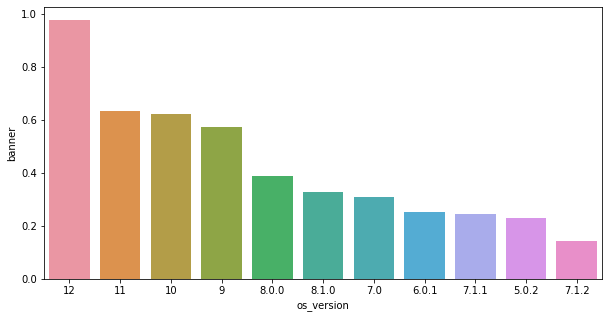

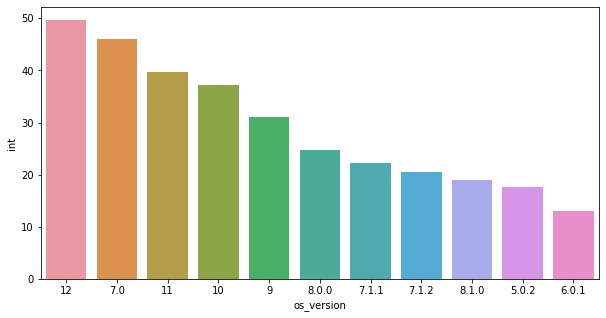

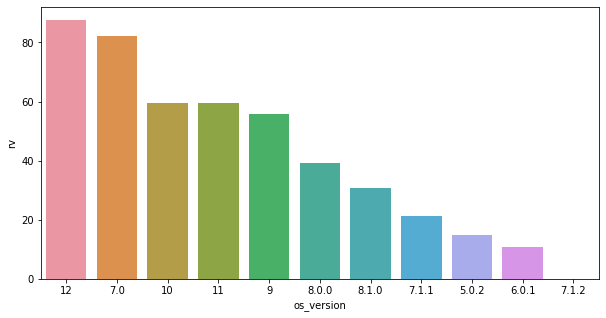

In [ ]:
for item in ['banner', 'int', 'rv']:
  plt.figure(figsize=(10,5))
  sns.barplot(x='os_version',y=item, data=df.pivot_table(index='os_version', values='ecpm_sma', columns='ad_type', aggfunc='mean').sort_values(by = item, ascending = False).reset_index())
  plt.show()

Видим, что самый большой средний eCPM у юзеров с ОС 12, 7.0 и 11, 10. Возможно, это связано с большей распространённостью данных ОС. Проверим это: 

In [ ]:
df['os_version'].value_counts()

12       407587
11       209071
10       150871
9         66662
8.1.0      9249
8.0.0      8016
7.0        4057
7.1.2      1811
7.1.1      1342
5.0.2       709
6.0.1       704
Name: os_version, dtype: int64

ОС 10, 11, 12 действительно являются самыми распространёнными среди юзеров данной выборки. А вот ОС 7.0 не столь распространена, но тем не меннее средний доход с показа рекламы достаточно большой.

Посмотрим на статистически значимые данные:

In [ ]:
df_mean_ad_type_os = df.pivot_table(index='os_version', values='ecpm_sma', columns='ad_type', aggfunc='mean')

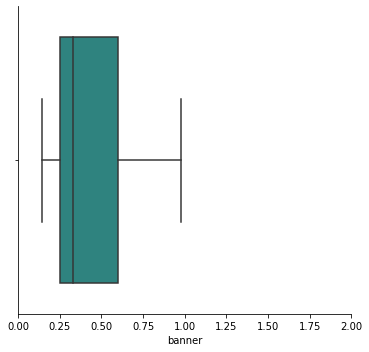

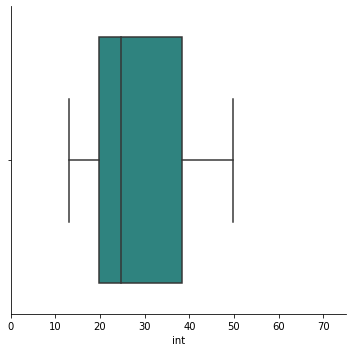

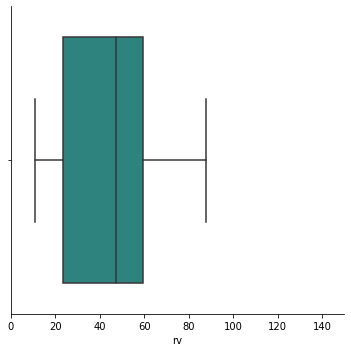

In [ ]:
for item in ['banner', 'int', 'rv']:
    sns.catplot(x=item, kind="box", data=df_mean_ad_type_os, palette='viridis')
    if item == 'banner':
      plt.xlim(0, 2)
    elif item == 'int':
      plt.xlim(0, 75)
    else:
      plt.xlim(0, 150)
    plt.show()

Средний eCPM в разрезе по ОС для баннеров составил порядка 0,3 USD, c "потолком" 1 USD, для полноэкранной рекламы - 25 USD, но не более50 USD, для видео 50 USD, Но не более 90 USD.

## Распределение суммарных eCPM-ов по городам

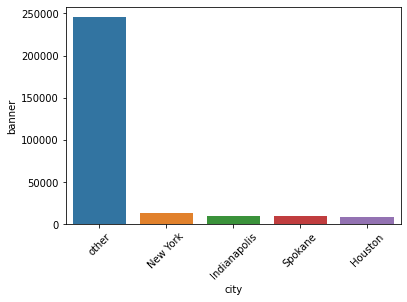

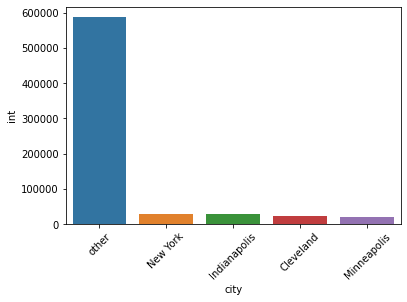

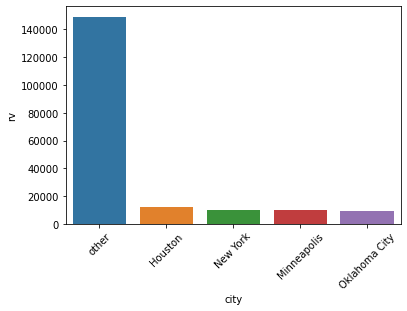

In [ ]:
for item in ['banner', 'int', 'rv']:
  sns.barplot(x='city',y=item, data=df.pivot_table(index='city', values='ecpm_sma', columns='ad_type', aggfunc='sum').sort_values(by = item, ascending = False).reset_index().head(5))
  plt.xticks(rotation=45)
  plt.show()

Видим, что для показов рекламы с неопределённым городом самый большой суммарный eCPM. <br>
Рассмотрим более детально выборку, в которых отсутсвуют неопределённые города:

In [ ]:
df_drop_other_city = df[df['city'] != 'other']

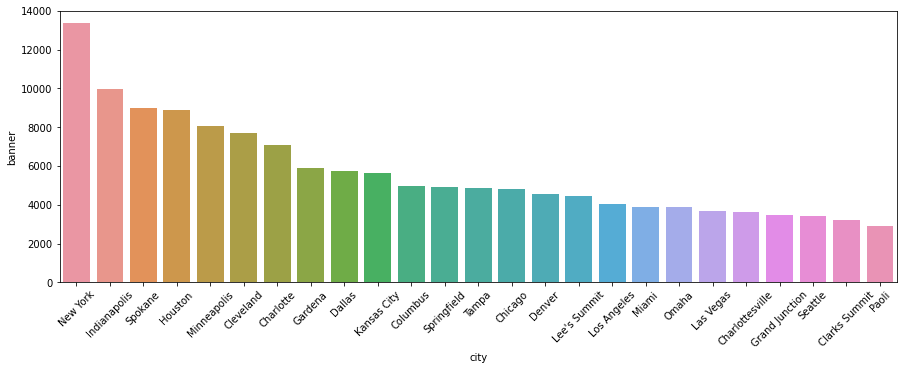

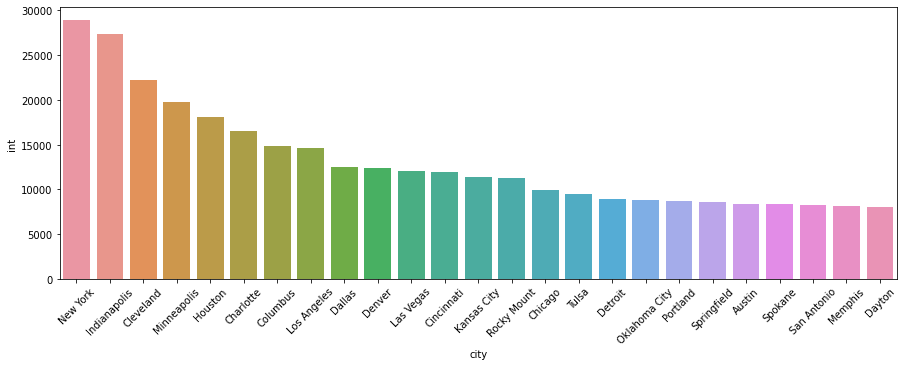

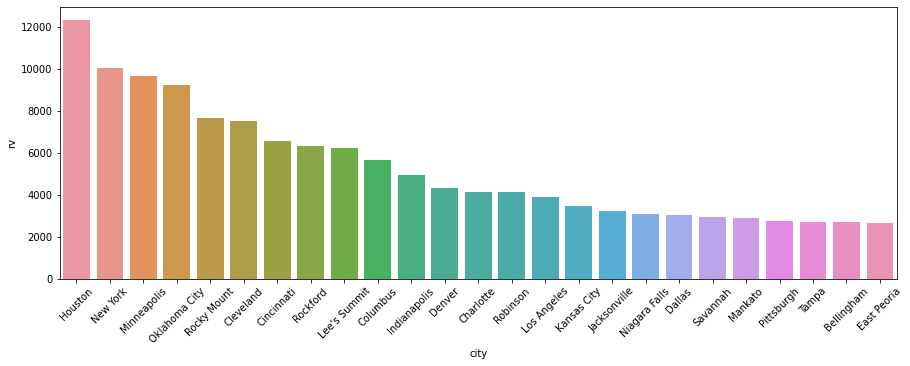

In [ ]:
for item in ['banner', 'int', 'rv']:
  plt.figure(figsize=(15,5))
  sns.barplot(x='city',y=item, data=df_drop_other_city.pivot_table(index='city', values='ecpm_sma', columns='ad_type', aggfunc='sum').sort_values(by = item, ascending = False).reset_index().head(25))
  plt.xticks(rotation=45)
  plt.show()

Видим, что от показов банеров самый большой суммарный доход в New York, Indianapolis, Spokane, Houstone. Полноэкранная реклама приносить наибольший доход в New York, Indianapolis, Cleveland. От показа видео-реклама самый большой суммарный eCPM в Houstone, New York, Minneapolis, Oklahoma City.

Посмотрим на статистически значимые данные:

In [ ]:
df_sum_ad_type_city = df.pivot_table(index='city', values='ecpm_sma', columns='ad_type', aggfunc='sum')

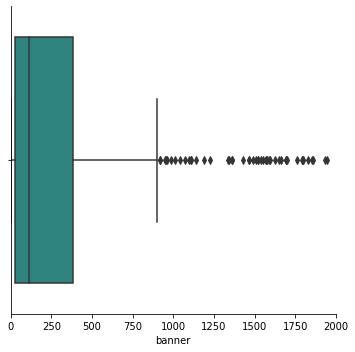

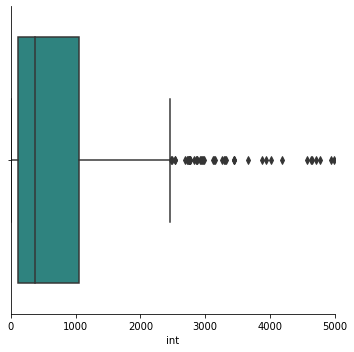

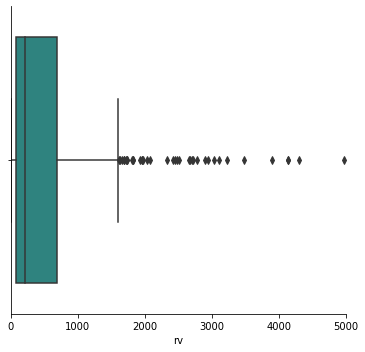

In [ ]:
for item in ['banner', 'int', 'rv']:
    sns.catplot(x=item, kind="box", data=df_sum_ad_type_city, palette='viridis')
    if item == 'banner':
      plt.xlim(0, 2000)
    else:
      plt.xlim(0, 5000)
    plt.show()

Для баннерной рекламы суммарный eCPM, превышающий 900 USD, является редким значением, для полноэкранной рекламы, как правило, суммарный eCPM не превышает 2500 USD. Для видео - не более 1500 USD.  

Посмотрим на 5 городов с самыми редкими значениями суммарного eCPM:

In [ ]:
df_sum_ad_type_city.query('(banner > 1000) and (rv > 2000) and (int > 3000)').head()

ad_type,banner,int,rv
city,,,
Birmingham,1567.187122,5611.683121,2081.285349
Charlotte,7100.429349,16518.379018,4144.707409
Cincinnati,1465.663171,11953.071425,6558.390332
Cleveland,7724.532399,22179.873192,7541.055735
Columbus,4988.715853,14807.142362,5657.316710


### Распределение суммарных eCPM-ов по версиям ОС

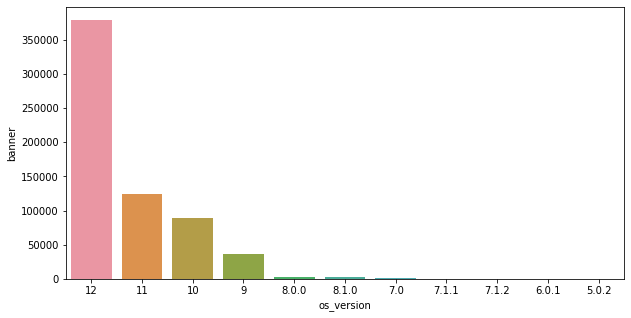

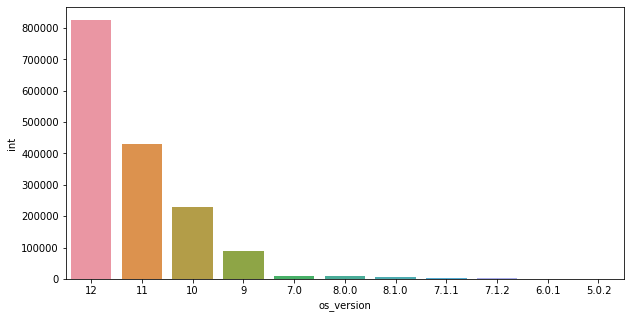

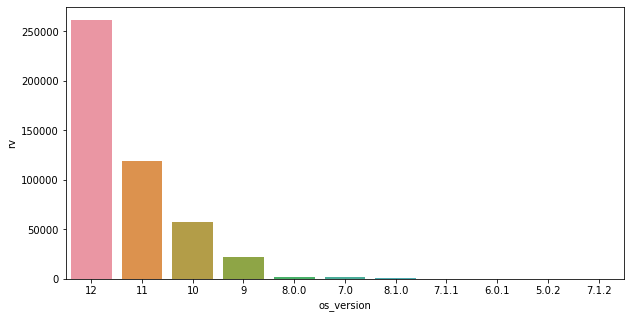

In [ ]:
for item in ['banner', 'int', 'rv']:
  plt.figure(figsize=(10,5))
  sns.barplot(x='os_version',y=item, data=df.pivot_table(index='os_version', values='ecpm_sma', columns='ad_type', aggfunc='sum').sort_values(by = item, ascending = False).reset_index())
  plt.show()

Самый большой суммарный eCPM у 12 верси ОС, далее по убыванию идут 11, 10 и 9. 

Посмотрим на статистически значимые данные:

In [ ]:
df_sum_ad_type_os = df.pivot_table(index='os_version', values='ecpm_sma', columns='ad_type', aggfunc='sum')

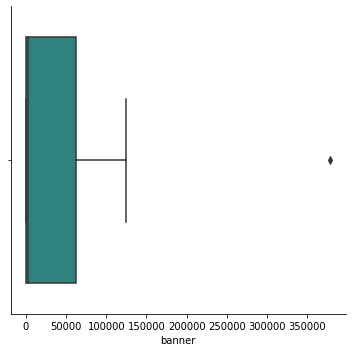

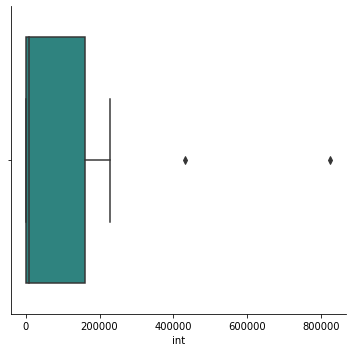

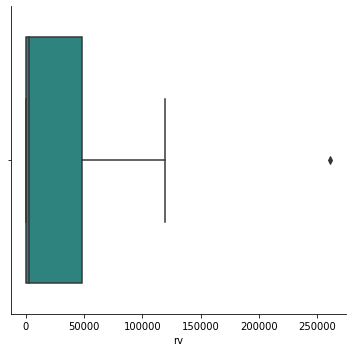

In [ ]:
for item in ['banner', 'int', 'rv']:
    sns.catplot(x=item, kind="box", data=df_sum_ad_type_os, palette='viridis')
    plt.show()

В разрезе версий ОС суммарный eCPM от показа баннеров 120000 USD, для полноэкранной рекламы - не более 220000 USD, для видео - не более 130000 USD. <br>
Есть аномальные значения, посмотрим на них

In [ ]:
df_sum_ad_type_os.query('banner > 350000')

ad_type,banner,int,rv
os_version,,,
12,378875.040959,825678.965076,261490.318107


Самый большой и редкий суммарный eCPM от пользователей самой распространённой 12 ОС. 

Посмотрим на диапазон самых распространёных в пределах нижнего и верхнего квартилей диаграмм размаха:

In [ ]:
df_sum_ad_type_os.query('(0 < banner < 100000) and (0 < int < 200000) and (0 < rv < 50000)')

ad_type,banner,int,rv
os_version,,,
5.0.2,156.378828,387.607832,30.033261
6.0.1,165.584706,570.409620,43.718567
7.0,1179.715300,9144.751172,2135.318707
7.1.1,313.043625,1464.820217,106.104939
8.0.0,2970.654648,8357.258777,2356.337478
8.1.0,2924.851483,6448.552672,893.225479
9,36235.759514,90155.950150,22003.938914


## Анализ зависимости eCPM от времени дня

Приведем event_receive_datetime к нужному фрмату:

In [ ]:
df['event_receive_datetime'] = pd.to_datetime(df['event_receive_datetime'])

Установим индекс таблицы равным столбцу event_receive_datetime и проверим, в хронологическом ли порядке расположены даты и время:

In [ ]:
df = df.set_index('event_receive_datetime')

In [ ]:
df.index.is_monotonic

False

Дата и время расположены не в хронологическом порядке, отсортируем их:

In [ ]:
df.sort_index(inplace=True)
df.index.is_monotonic

True

Выполним ресемлирование даты:

In [ ]:
df = df.resample('1H').sum()

Разложим временной ряд на тренд и сезонную компоненту:

In [ ]:
decomposed = seasonal_decompose(df)

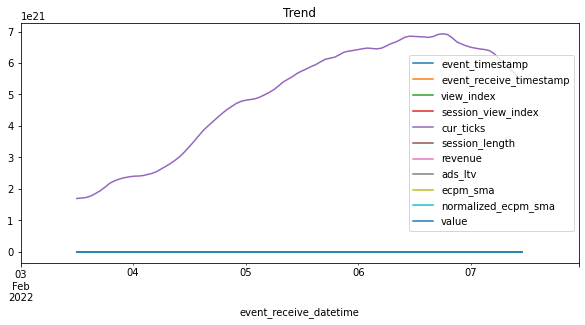

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.show()

Видим, что больше всего показов в июне.

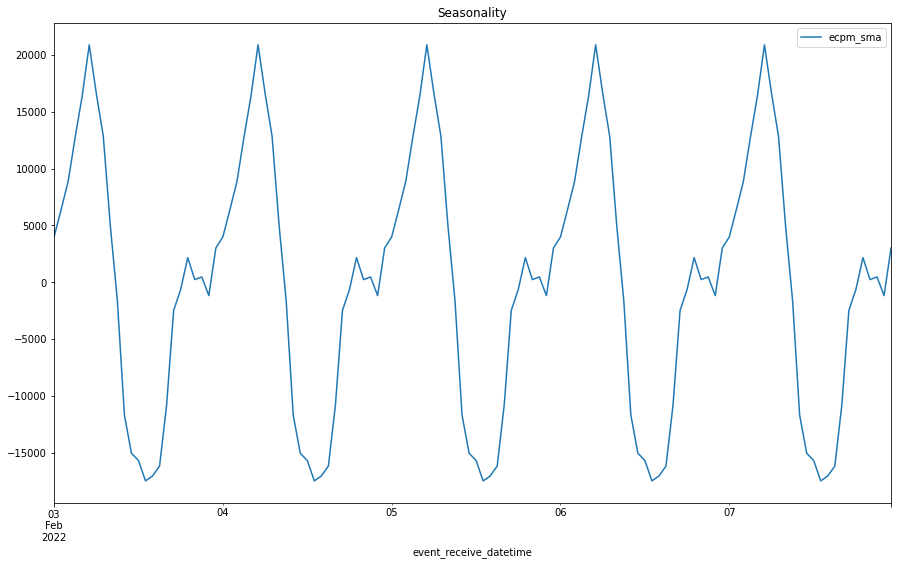

In [ ]:
plt.figure(figsize=(15, 30))
plt.subplot(312)
decomposed.seasonal['2022-01-01':'2022-07-01'].plot(ax=plt.gca(), y='ecpm_sma')
plt.title('Seasonality')
plt.show()

Из графика видим, что больше всего показов рекламы во время игры наблюдается в дообеденое утреннее время, к середине дня наблюдается спад активности юзеров, после обеда активность увеличивается.

# Вывод

Наибольшие средние eCPM юзеров получились для видео-рекламы.
Средние значения eCPM по городам в большинстве своём находятся в диапазоне 0,3 до 1,2 USD для баннеров, 20 – 60 USD для полноэкранной рекламы, 30 – 120 USD для видео-рекламы. <br>
Самый большой средний eCPM у пользователей с ОС 9, 10, 11, 12. <br>
Самый большой суммарный eCPM для пользователей из New York, Indianapolis, Houstone. <br>
Самый большой и редкий суммарный eCPM для пользователей с ОС 12. <br>
62% eCPM содержат информацию о городах, при этом именно у оставшихся 38% данных с неопределенными городами самый большой суммарный eCPM. <br>
В данных есть прослеживается сезонность, наибольшая активность по показу рекламы зафиксирована в первой дообеденной половине дня с резким падением в обеденные часы и началом роста после них. 


